# pyfolioを使用したバックテスト結果の表示例

Special thanks, drillerさん！

このnotebookは drillerさんに作成していただいたものをSmartTradeで編集したものです。ありがとうございます！

### 注意

既存のプロジェクトのソースコードを書き換えます。  
重要なソースコードを書き換えないよう、hashを指定する際には注意してください

### やりたいこと

- 指定されたhashのプロジェクトを取得
- バックテストを実行
- pyfolioで結果表示

### 事前準備
`api_key.py` を用意

```python
public_key = 'xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx'
secret_key = 'xxxxxxxx-xxxx-xxxx-xxxx-xxxxxxxxxxxx'
```


In [1]:
import time

import numpy as np
import pandas as pd
# workaround for pyfolio caused by pandas_datareader
# https://stackoverflow.com/questions/50394873/import-pandas-datareader-gives-importerror-cannot-import-name-is-list-like
pd.core.common.is_list_like = pd.api.types.is_list_like

import pyfolio as pf
from jinja2 import Template
from quantx_sdk import QX

import api_key

In [2]:
# pyfolioにバグがあるようなので、回避策
# https://github.com/quantopian/pyfolio/issues/486
pf.plotting.plot_rolling_fama_french = pf.plotting.plot_returns

In [3]:
# バックテストを実行したいプロジェクトのhashを設定
project_hash = 'xxxxxxxxxxxxxxxxxxxxxx'
backtest_params = {
    "from_date": "2015-01-01", "to_date": "2018-06-01"
}

In [5]:
qx = QX(api_key.public_key, api_key.secret_key)
project = qx.project(project_hash)
backtest = project.backtest(backtest_params)
res = backtest.join()
if not backtest.completed():
    print(backtest.get_error())
    raise
df = res.benchmark()
df.head()

,portfolio_value,cash,positions_value,returns,pnl,portfolio_daily_returns,benchmark,benchmark_cumulative_returns,benchmark_daily_returns,portfolio_cumulative_returns
index,,,,,,,,,,
2015-01-05,2000000.0,2000000.0,0.0,0.0,0.0,NaN,17408.699219,0.00,NaN,0.0
2015-01-06,2000000.0,2000000.0,0.0,0.0,0.0,0.0,16883.199219,-0.03,-0.030186,0.0
2015-01-07,2000000.0,2000000.0,0.0,0.0,0.0,0.0,16885.300781,-0.03,0.000124,0.0
2015-01-08,2000000.0,2000000.0,0.0,0.0,0.0,0.0,17167.099609,-0.01,0.016689,0.0
2015-01-09,2000000.0,2000000.0,0.0,0.0,0.0,0.0,17197.699219,-0.01,0.001782,0.0


pyfolioのtear_sheet

Start date,2015-01-05
End date,2018-06-01
Total months,39
,Backtest
Annual return,28.6%
Cumulative returns,130.4%
Annual volatility,14.1%
Sharpe ratio,1.86
Calmar ratio,2.48
Stability,0.95
Max drawdown,-11.5%


/usr/local/lib/python3.6/site-packages/numpy/core/fromnumeric.py:51: FutureWarning: 'argmin' is deprecated, use 'idxmin' instead. The behavior of 'argmin'
will be corrected to return the positional minimum in the future.
Use 'series.values.argmin' to get the position of the minimum now.
  return getattr(obj, method)(*args, **kwds)


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,11.51,2015-08-14,2015-09-29,2016-02-02,123
1,7.26,2016-07-20,2016-11-09,2016-12-07,101
2,6.58,2016-02-02,2016-02-24,2016-03-24,38
3,6.28,2016-06-07,2016-06-24,2016-07-19,31
4,6.05,2018-01-24,2018-04-04,NaT,NaN


IndexError: invalid index

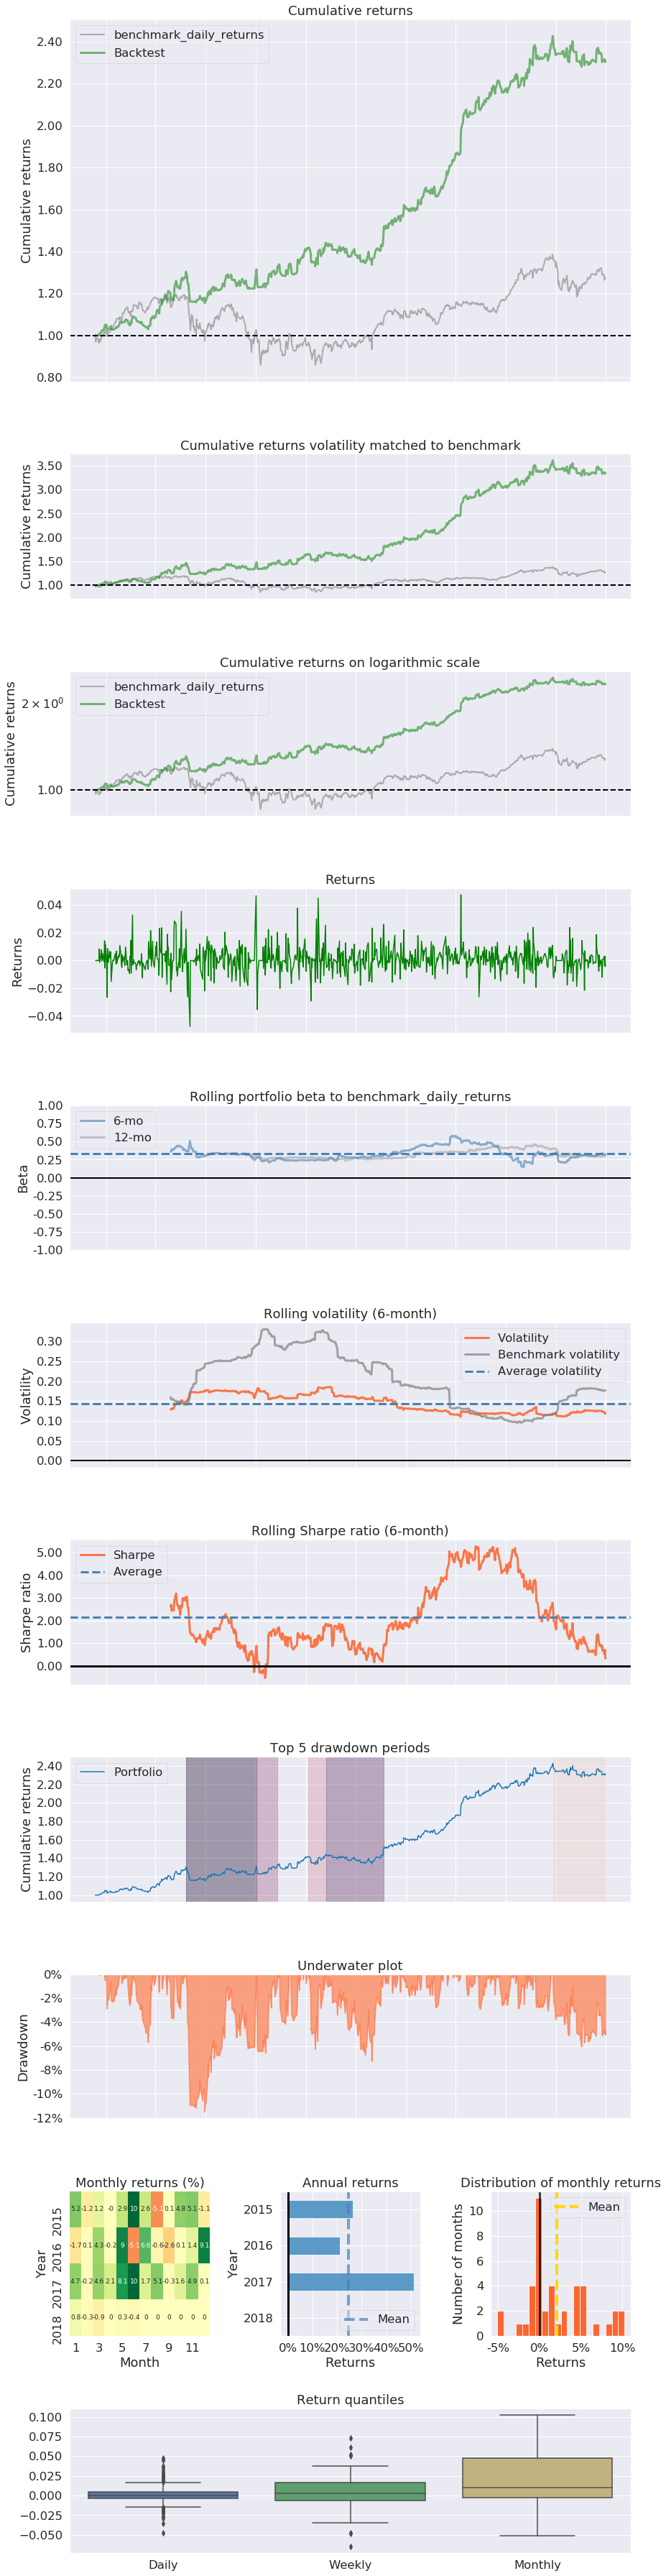

In [6]:
pf.create_returns_tear_sheet(
    df["portfolio_daily_returns"], benchmark_rets=df["benchmark_daily_returns"]
)
